# title

In [1]:
%load_ext autoreload
%autoreload 2

In [40]:
from autoplan.trainer import ClassifierTrainer
from autoplan.dataset import PrelabeledDataset
from autoplan.vis import plot_accuracy, plot_cm, plot_loss
from autoplan.token import TokenType
from scripts.rainfall_ingest import ingest_dataset
from grammars.rainfall.labels import GeneralRainfallLabels as Labels

from tqdm.auto import tqdm
import pandas as pd
import torch
import torch.nn as nn
import os
from pickle_cache import PickleCache
import numpy as np

device = torch.device('cuda:7')
REPO_DIR = os.path.expanduser('~/autoplan')
pcache = PickleCache()

In [3]:
datasets = pcache.get('rainfall_datasets', lambda: {k: ingest_dataset(k) for k in ['T1', 'T1Acc']})

In [55]:
print(datasets['T1Acc'].dataset[0]['source'])

fun rainfall(nums :: List<Number>) -> Number:
  #this took approximatly 25-30 minutes
  fun get-values(lst :: List<Number>) -> {sum :: Number, length :: Number}:
    doc: ```returns the sum of the correct values in lst, and the number of correct values```
    cases(List<Numbers>) lst:
      | empty  =>  {sum : 0, length : 0}
      | link(f,r)  => 
        if f  ==  -999:
          {sum : 0, length : 0}
        else if f < 0:
          v = get-values(r)
          {sum : v.sum, length : v.length}
        else:
          v = get-values(r)
          {sum : v.sum  +  f, length : v.length  +  1}
        end
    end
  end
  vals = get-values(nums)
  if vals.length  ==  0:
    raise(```error: no correct input values```)
  else:
    vals.sum  /  vals.length
  end
  end




In [16]:
val = ClassifierTrainer.crossval(
    datasets['T1Acc'], k=10, epochs=100, val_frac=0.33, progress=True, device=device, model_opts={
        'model': nn.GRU,
        'embedding_size': 256,
        'hidden_size': 256
    })
np.mean(val['accuracy'])

0.7461538461538462

In [28]:
model_opts= {
    'model': nn.GRU,
    'embedding_size': 512,
    'hidden_size': 512
}
trainer = ClassifierTrainer(datasets['T1'], device=device, val_frac=0.33, model_opts=model_opts)
losses, train_eval, val_eval = trainer.train(epochs=100)

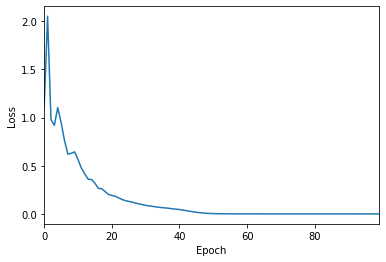

In [29]:
plot_loss(losses)

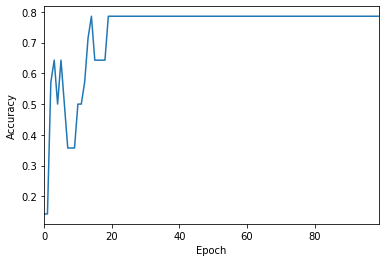

In [30]:
plot_accuracy(val_eval)

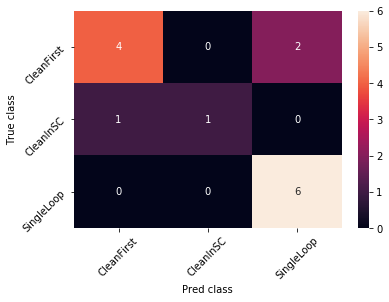

In [31]:
val_eval[-1].plot_cm(title='', normalize=False)

In [52]:
val_eval[-1].print_incorrect(trainer.val_dataset, Labels)

let rainfall (alon : int list) =
  try
    (List.fold_right
       (fun x  ->
          fun y  -> if x = (-999) then 0 else if x < 0 then y else x + y)
       alon 0)
      /
      (List.fold_right
         (fun x  ->
            fun y  -> if x = (-999) then 0 else if x < 0 then y else 1 + y)
         alon 0)
  with
  | Division_by_zero  ->
      failwith
        "Please input a list with at least one non-negative value before the first instance of -999."

Pred: GeneralRainfallLabels.CleanFirst
True: GeneralRainfallLabels.CleanInSC

let rainfall (alon : int list) =
  (let rec rainfallHelp (alon : int list) (nlon : int list) =
     (match alon with
      | [] ->
          (List.fold_right (fun x  -> fun y  -> x + y) nlon 0) /
            (List.length nlon)
      | hd::tl ->
          (match hd with
           | (-999) ->
               if (List.length nlon) = 0
               then 0
               else
                 (List.fold_right (fun x  -> fun y  -> x + y) nlon 0) /
             